In [2]:
from pseudowalls import *
%display latex

In [3]:
def plot_central_charge(chern, name, argument = None, radius = None):
	Z = stability.Mumford().central_charge(chern)
	x = Z.real()
	y = Z.imag()

	if not argument:
		argument = arctan(y/x) if x != 0 else pi / 2
		if argument <= 0:
			argument += pi

	if not radius:
		radius = (pi-argument/2)/pi

	return point(
		Z,
		marker = "o",
		size = 800,
		rgbcolor = "white",
		#markeredgecolor = "purple",
		zorder = 100
	) + point(
		Z,
		marker = name,
		size = 700,
		rgbcolor = "red",
		zorder = 101
	) + line(
		(0, Z),
		rgbcolor = "red",
		linestyle = "dashed",
		zorder = 99
	) + disk(
		(0,0),
		float(radius),
		(0, float(argument)),
		alpha=.2,
		fill=False,
		thickness=1,
		rgbcolor="purple"
	)


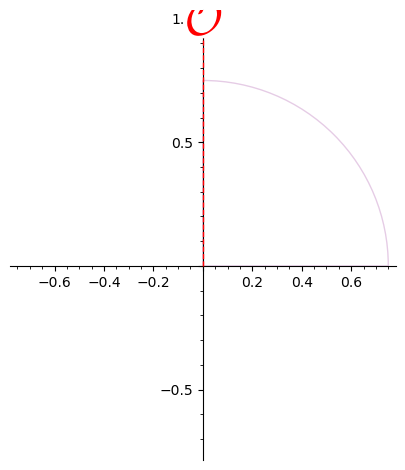

In [7]:
plot_central_charge(Chern_Char(1,0), r"$\mathcal{O}$")

In [12]:
def MumfordCentralChargePlot():
    O = Chern_Char(1,0)
    O1 = exponential_chern(1,1)
    O1inv = exponential_chern(-1,1)
    O2 = O1 * O1
    O_x = Chern_Char(0,1)


    p = sum(
        plot_central_charge(chern, name)
        for chern, name in [
            (O1, r"$\mathcal{Z}(\mathcal{O}(1))$"),
            (O, r"$\mathcal{Z}(\mathcal{O}_X)$"),
            (O1inv, r"$\mathcal{Z}(\mathcal{O}(-1))$"),
            (O2, r"$\mathcal{Z}(\mathcal{O}(2))$"),
            (O_x, r"$\mathcal{Z}(\mathcal{O}_p)$")
        ]
    )

    xmax = (2.5)
    xmin = (-2.5)
    ymin = (-0.25)
    ymax = (1.5)
    aspect_ratio = (1)

    p += polygon(
        [
            (xmax + 1,0),
            (xmin - 1,0),
            (xmin - 1,ymax + 1),
            (xmax + 1,ymax + 1)
        ],
        rgbcolor = "yellow",
        alpha = 0.2,
        zorder = 102
    )

    p.xmax(xmax)
    p.xmin(xmin)
    p.ymin(ymin)
    p.ymax(ymax)
    p.set_aspect_ratio(aspect_ratio)

    p.axes_labels([r"$\mathcal{R}$",r"$\mathcal{I}$"])
    return p


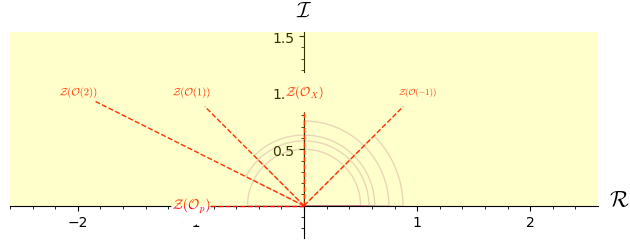

In [13]:
MumfordCentralChargePlot()

In [16]:
def NoShiftPhase():
	O = Chern_Char(1,0,0)
	p = plot_central_charge(O, r"$\mathcal{O}_X$", radius = 0.9)
	p += text(r"$\phi = \frac{1}{2}$" , (0.5, 0.5), rgbcolor="purple", fontsize="xx-large")
	p.ymax(1.2)
	p.ymin(-1.2)
	p.xmax(1.2)
	p.xmin(-1.2)
	return p


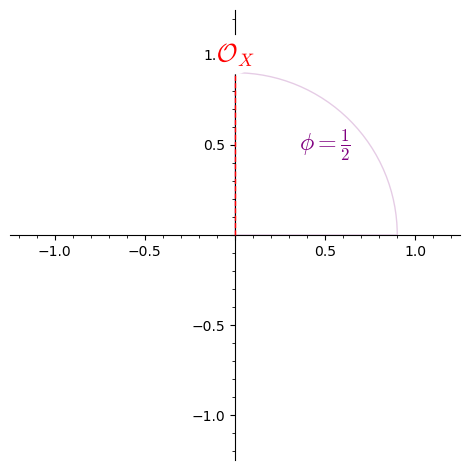

In [17]:
NoShiftPhase()

In [18]:
def OneShiftPhase():
	O = Chern_Char(-1,0,0)
	p = plot_central_charge(O, r"$\mathcal{O}_X[1]$", argument=3*pi/2, radius=0.9)
	p += text(r"$\phi = \frac{3}{2}$" , (-0.5, 0.5), rgbcolor="purple", fontsize="xx-large")
	p.ymax(1.2)
	p.ymin(-1.2)
	p.xmax(1.2)
	p.xmin(-1.2)
	return p


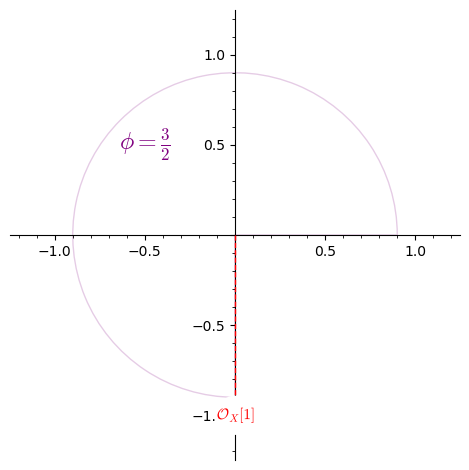

In [19]:
OneShiftPhase()

In [20]:
def TwoShiftPhase():
	O = Chern_Char(1,0,0)
	p = plot_central_charge(O, r"$\mathcal{O}_X[2]$", argument=2*pi, radius=0.9)

	p += disk(
		(0,0),
		float(0.9),
		(0, float(5*pi/2)),
		alpha=.6,
		fill=False,
		thickness=1,
		rgbcolor="purple"
	)
	p += text(r"$\phi = \frac{5}{2}$" , (0.5, 0.5), rgbcolor="purple", fontsize="xx-large")
	p.ymax(1.2)
	p.ymin(-1.2)
	p.xmax(1.2)
	p.xmin(-1.2)
	return p

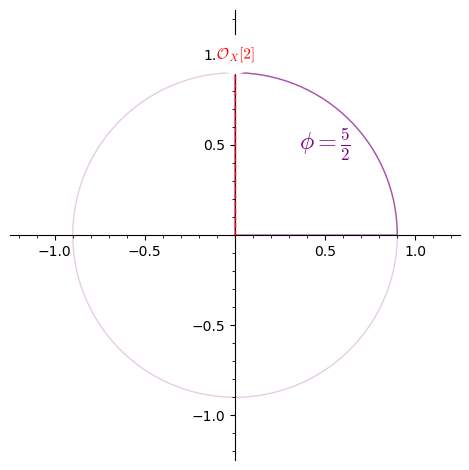

In [21]:
TwoShiftPhase()